<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/Regresi%C3%B3n_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy as sp
import yfinance as yf

In [ ]:
stock = 'META'
ticker = yf.Ticker(stock)
priceM = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

priceM.head()


,Close
Date,
2013-01-01 00:00:00-05:00,30.887001
2013-02-01 00:00:00-05:00,27.168200
2013-03-01 00:00:00-05:00,25.503214
2013-04-01 00:00:00-04:00,27.686640
2013-05-01 00:00:00-04:00,24.276905


In [ ]:
priceM.index = priceM.index.strftime('%Y-%m-%d')
priceM.index = pd.to_datetime(priceM.index)

priceM

,Close
Date,
2013-01-01,30.887001
2013-02-01,27.168200
2013-03-01,25.503214
2013-04-01,27.686640
2013-05-01,24.276905
...,...
2023-08-01,295.001801
2023-09-01,299.308838
2023-10-01,300.365601


In [ ]:
stock = 'NVDA'
ticker = yf.Ticker(stock)
priceN = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

priceN.head()

,Close
Date,
2013-01-01 00:00:00-05:00,0.282920
2013-02-01 00:00:00-05:00,0.292150
2013-03-01 00:00:00-05:00,0.297890
2013-04-01 00:00:00-04:00,0.319715
2013-05-01 00:00:00-04:00,0.335968


In [ ]:
priceN.index = priceN.index.strftime('%Y-%m-%d')
priceN.index = pd.to_datetime(priceM.index)

priceN

,Close
Date,
2013-01-01,0.282920
2013-02-01,0.292150
2013-03-01,0.297890
2013-04-01,0.319715
2013-05-01,0.335968
...,...
2023-08-01,49.336006
2023-09-01,43.482265
2023-10-01,40.767666


In [ ]:
data1 = priceM["2015":]
data1

,Close
Date,
2015-01-01,75.682137
2015-02-01,78.732941
2015-03-01,81.973190
2015-04-01,78.533539
2015-05-01,78.952293
...,...
2023-08-01,295.001801
2023-09-01,299.308838
2023-10-01,300.365601


In [19]:
data2 = priceN["2015":]
data2

,Close
Date,
2015-01-01,0.460854
2015-02-01,0.529502
2015-03-01,0.504313
2015-04-01,0.534914
2015-05-01,0.533228
...,...
2023-08-01,49.336006
2023-09-01,43.482265
2023-10-01,40.767666


In [20]:
data = pd.DataFrame(data1.values, columns=['Y'], index=data1.index)
data.head()


,Y
Date,
2015-01-01,75.682137
2015-02-01,78.732941
2015-03-01,81.973190
2015-04-01,78.533539
2015-05-01,78.952293


In [21]:
data = data.join(priceN)

In [22]:
getattr(data.index, 'month_name')


<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=108, freq=None)>

In [23]:
data['mes'] = data.index.month_name()
data

,Y,Close,mes
Date,,,
2015-01-01,75.682137,0.460854,January
2015-02-01,78.732941,0.529502,February
2015-03-01,81.973190,0.504313,March
2015-04-01,78.533539,0.534914,April
2015-05-01,78.952293,0.533228,May
...,...,...,...
2023-08-01,295.001801,49.336006,August
2023-09-01,299.308838,43.482265,September
2023-10-01,300.365601,40.767666,October


In [24]:
data = pd.get_dummies(data, columns=['mes'], prefix="", prefix_sep="", drop_first=True, dtype=float)
data

,Y,Close,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,,
2015-01-01,75.682137,0.460854,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-01,78.732941,0.529502,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-03-01,81.973190,0.504313,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2015-04-01,78.533539,0.534914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-05-01,78.952293,0.533228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,295.001801,49.336006,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-09-01,299.308838,43.482265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2023-10-01,300.365601,40.767666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Valores Atípicos


In [39]:
Fecha_2018 = pd.Series(data = [1], index=pd.to_datetime(["2018-07-01"]), name='2018_outlier')
Fecha_2020 = pd.Series(data = [1], index=pd.to_datetime(["2020-03-01"]), name='2020_outlier')

In [40]:
Fecha_2018

,2018_outlier
2018-07-01,1


In [45]:
data = data.join(Fecha_2018, lsuffix='_caller', rsuffix='_other').fillna(0) # add suffixes to distinguish between columns with the same name


In [46]:
data["2018":"2018"]


,Y,Close,August,December,February,January,July,June,March,May,November,October,September,2020_outlier,2018_outlier_caller,2018_outlier_other
Date,,,,,,,,,,,,,,,,
2018-01-01,186.328979,6.078999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-02-01,177.784729,5.985018,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-03-01,159.310333,5.731123,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-04-01,171.483688,5.565567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-05-01,191.204315,6.240909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-06-01,193.736679,5.866154,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-07-01,172.061951,6.063262,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2018-08-01,175.202484,6.950243,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-09-01,163.966324,6.962468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
data = data.join(Fecha_2020, lsuffix='_caller', rsuffix='_other').fillna(0) # add suffixes to distinguish between columns with the same name


In [51]:
data["2020":"2020"]


,Y,Close,August,December,February,January,July,June,March,May,November,October,September,2020_outlier_caller,2018_outlier_caller,2018_outlier_other,2020_outlier_other
Date,,,,,,,,,,,,,,,,,
2020-01-01,201.303894,5.886479,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-01,191.892242,6.724026,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,166.299286,6.566866,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-04-01,204.095505,7.281349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-01,224.414307,8.844342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-01,226.388382,9.464408,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-07-01,252.908508,10.582314,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-01,292.319855,13.333632,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-09-01,261.113831,13.489157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Lags

In [52]:

data['lag1'] = data['Y'].shift(1)
data['lag2'] = data['Y'].shift(2)
data['lag3'] = data['Y'].shift(3)
data['lag4'] = data['Y'].shift(4)
data['lag5'] = data['Y'].shift(5)
data['lag6'] = data['Y'].shift(6)
data['lag7'] = data['Y'].shift(7)
data['lag8'] = data['Y'].shift(8)
data['lag9'] = data['Y'].shift(9)
data['lag10'] = data['Y'].shift(10)
data['lag11'] = data['Y'].shift(11)
data['lag12'] = data['Y'].shift(12)

In [53]:
data.head(13)

,Y,Close,August,December,February,January,July,June,March,May,...,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,75.682137,0.460854,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,78.732941,0.529502,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-01,81.973190,0.504313,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01,78.533539,0.534914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.682137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-01,78.952293,0.533228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,78.732941,75.682137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-01,85.512520,0.486798,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,81.973190,78.732941,75.682137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-01,93.727798,0.482925,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,78.533539,81.973190,78.732941,75.682137,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-01,89.161545,0.544168,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,78.952293,78.533539,81.973190,78.732941,75.682137,NaN,NaN,NaN,NaN,NaN
2015-09-01,89.630135,0.599208,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.512520,78.952293,78.533539,81.973190,78.732941,75.682137,NaN,NaN,NaN,NaN


In [55]:
data = data["2015":]


## Aplica el modelo de regresión


In [56]:
import statsmodels.api as sm


In [58]:
# Check for infinite values
print(np.isinf(data).any())

# Check for NaNs
print(np.isnan(data).any())

# Replace infinite values with NaNs
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaNs
data.dropna(inplace=True)

# Now try running the regression again
print(sm.OLS(data['Y'], data.drop(columns=['Y'])).fit().summary())

Y                      False
Close                  False
August                 False
December               False
February               False
January                False
July                   False
June                   False
March                  False
May                    False
November               False
October                False
September              False
2020_outlier_caller    False
2018_outlier_caller    False
2018_outlier_other     False
2020_outlier_other     False
lag1                   False
lag2                   False
lag3                   False
lag4                   False
lag5                   False
lag6                   False
lag7                   False
lag8                   False
lag9                   False
lag10                  False
lag11                  False
lag12                  False
dtype: bool
Y                      False
Close                  False
August                 False
December               False
February               False
Ja

In [59]:
from sklearn.linear_model import LinearRegression


In [60]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).score(data.drop(columns=['Y']), data['Y'])


0.9524069945854572

In [61]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).coef_


array([ 4.16863757e-01, -1.55291625e+01, -8.21345074e+00, -2.59269374e+01,
       -6.14263381e+00, -1.30973435e+00, -9.28177828e+00, -3.85279848e+00,
       -5.88443941e+00, -9.34085288e+00, -1.35132877e+01, -2.91446923e+01,
       -1.40013895e+01, -1.47413496e+01, -1.47413496e+01, -1.40013895e+01,
        1.04181698e+00, -4.86620361e-02,  7.91943801e-02,  1.03581957e-02,
       -1.81122096e-01, -1.22785453e-01,  1.27641536e-01,  1.71487761e-01,
       -1.76147005e-01,  1.00146064e-01, -2.91711421e-01,  1.82703360e-01])

In [62]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).intercept_


28.639109124521127

In [63]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).feature_names_in_


array(['Close', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September',
       '2020_outlier_caller', '2018_outlier_caller', '2018_outlier_other',
       '2020_outlier_other', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5',
       'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12'],
      dtype=object)

In [64]:
LinearRegression().fit(data.drop(columns=['Y']), data['Y']).n_features_in_


28

In [65]:
errors = LinearRegression().fit(data.drop(columns=['Y']), data['Y']).predict(data.drop(columns=['Y'])) - data['Y']


In [66]:
errors.head()


,Y
Date,
2016-01-01,5.585505
2016-02-01,1.065334
2016-03-01,9.292047
2016-04-01,13.837730
2016-05-01,10.820334


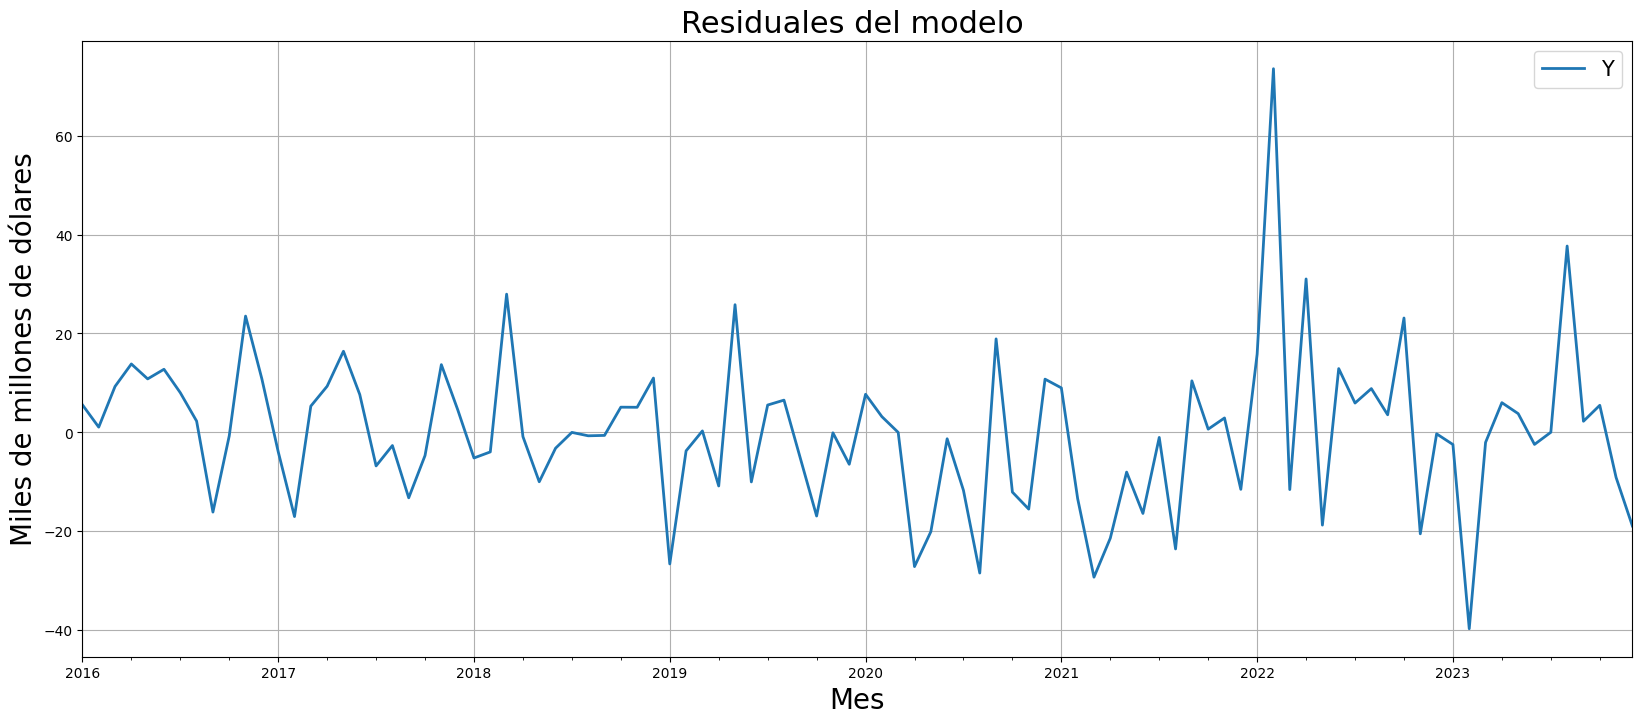

In [68]:

fig, ax = plt.subplots(1, 1, figsize = (20, 8))
errors.plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Residuales del modelo ', fontsize=22)
ax.set_ylabel('Miles de millones de dólares', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [69]:
errors.mean()


1.0954200509634878e-14

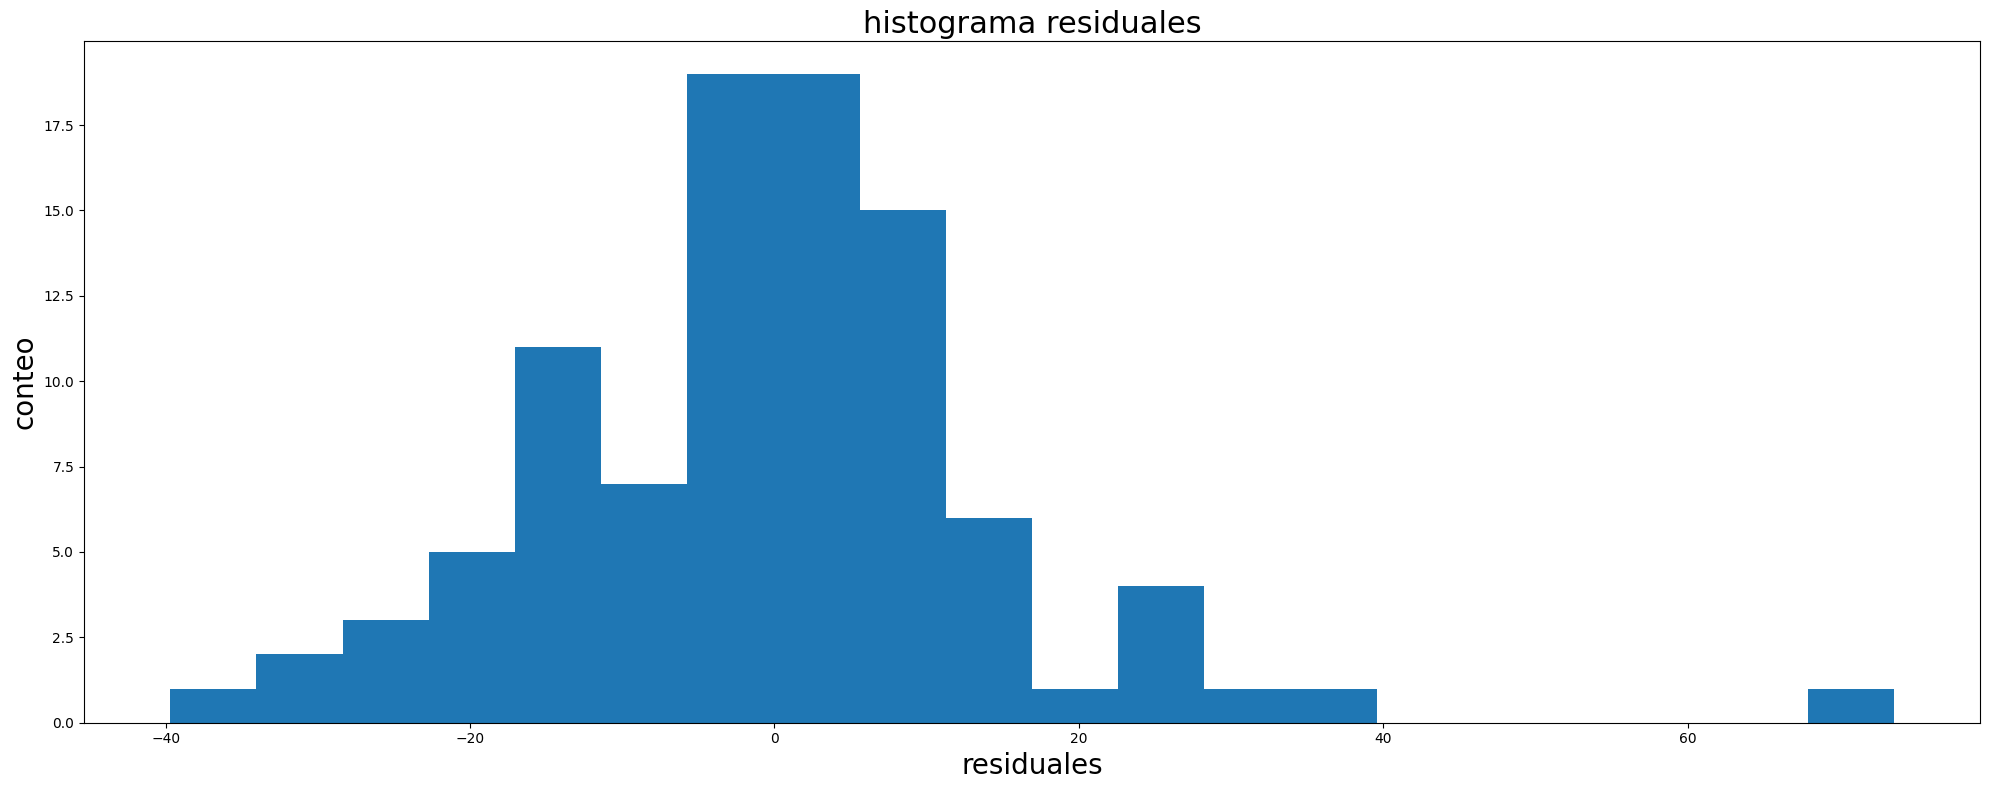

In [70]:


# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(errors, bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Text(0, 0.5, 'ACF')

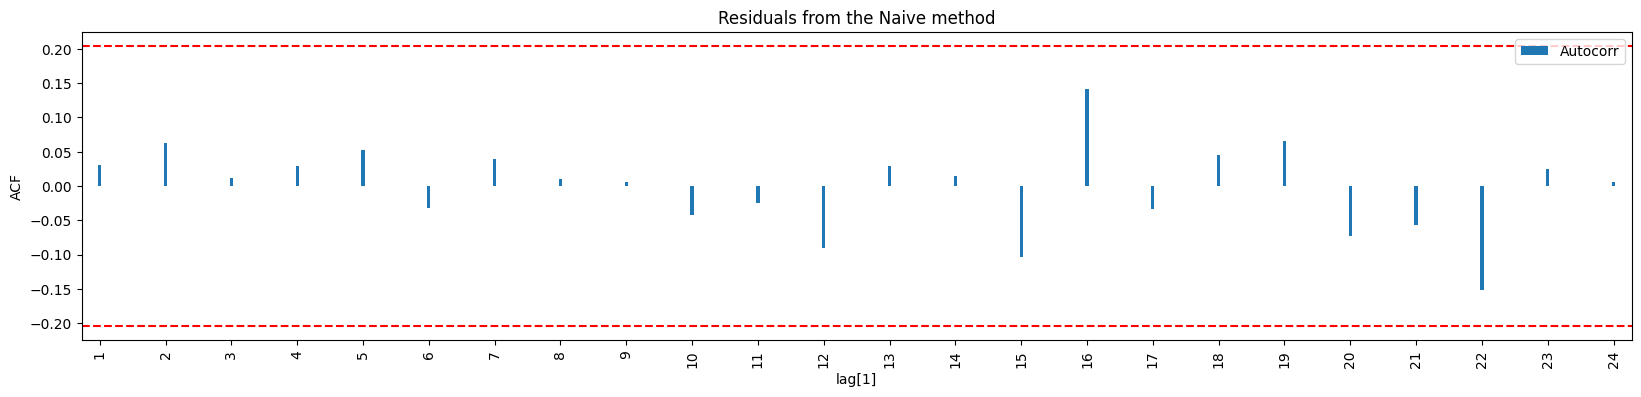

In [71]:

import math

ticker_data = errors
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(errors)
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

